## Reading Data

In [1]:
import sys
from pathlib import Path
d = Path().resolve().parent.parent
sys.path.insert(0, str(d))

import util.utils as utils
import util.plot_utils as plot_utils


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mplt
import matplotlib.pyplot as plt


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv("../data/sherbank-housing/train.csv")

df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


## Summary Statistics


### Describing and Visualizing Predicted Column

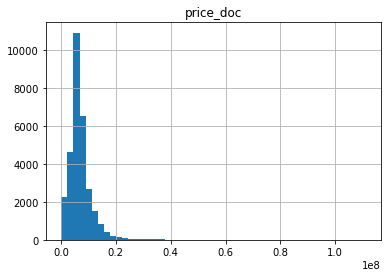

In [3]:
pd.DataFrame(df["price_doc"].describe())

df.hist(column='price_doc', bins=50)
plt.show();

### Null Value Summaries
- Only NaN does not specify missing values
- In this DataSet even 0 specifies missing values


In [4]:
# Count of Nan in this column
df["max_floor"].isnull().sum()



df_counts = utils.count_distinct_values_column(df,"max_floor")
df_counts.head()

# Total count of all Nans
# df.isnull().values.sum()

# Count of values after filter in a particular column
np.sum(df["max_floor"].isin([0]).values)


9572

,max_floor
NaN,9572
17.0,4672
9.0,3025
5.0,2267
12.0,2229


550

### Column Summary

In [149]:
column_summary_df = utils.column_summaries(df)
column_summary_df.head(5)

df.select_dtypes(include=[np.object]).head(5)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
0_13_all,0,0.0,146,0,int64,1.003908,30471.0,9841.097535,7290.007118,322.0,3112.0,9633.0,13121.0,36035.0
0_13_female,0,0.0,146,0,int64,0.961460,30471.0,4803.833153,3536.907486,156.0,1512.0,4667.0,6699.0,17461.0
0_13_male,0,0.0,144,0,int64,1.045281,30471.0,5037.272489,3760.750648,166.0,1600.0,4835.0,6684.0,18574.0
0_17_all,0,0.0,145,0,int64,0.967245,30471.0,12540.611303,9253.046693,411.0,3831.0,12508.0,16727.0,45170.0
0_17_female,0,0.0,146,0,int64,0.930242,30471.0,6117.569525,4491.734947,198.0,1858.0,6185.0,8549.0,21937.0


,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,2011-08-20,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,2011-08-23,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,2011-08-27,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,2011-09-01,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,2011-09-05,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent


## Plots 

### Plotting price vs columns

------Histograms for Distribution------


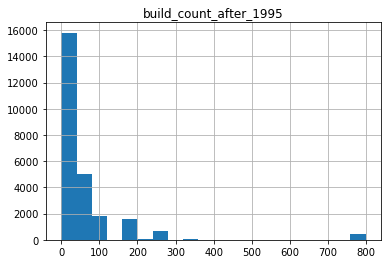

------Feature vs Predicted Column------


C:\Users\faiza\Documents\GitHub\data-science\util\plot_utils.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["log_%s" %f_name] = np.log(df[f_name]+1)
C:\Users\faiza\Documents\GitHub\data-science\util\plot_utils.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["square_root_%s" %f_name] = df[f_name]**0.5
C:\Users\faiza\Documents\GitHub\data-science\util\plot_utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

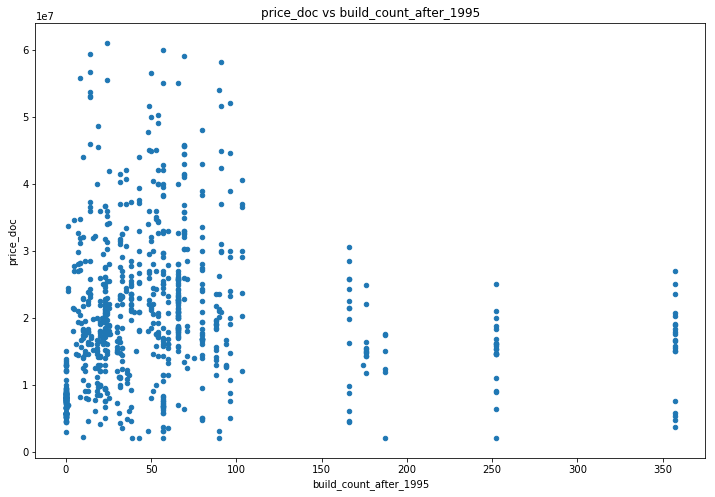

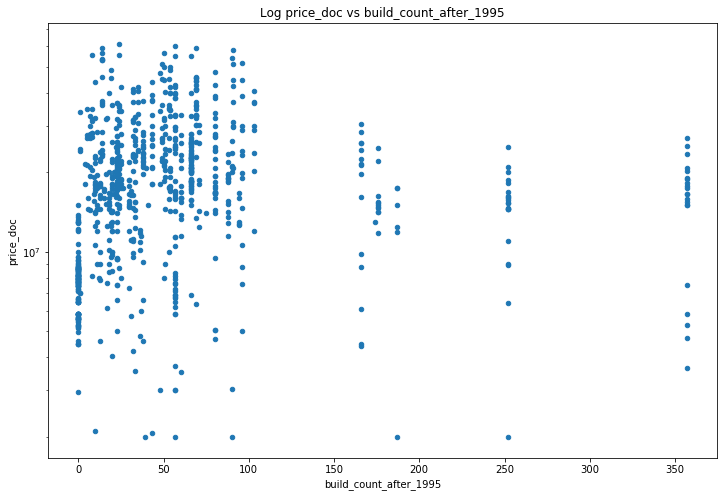

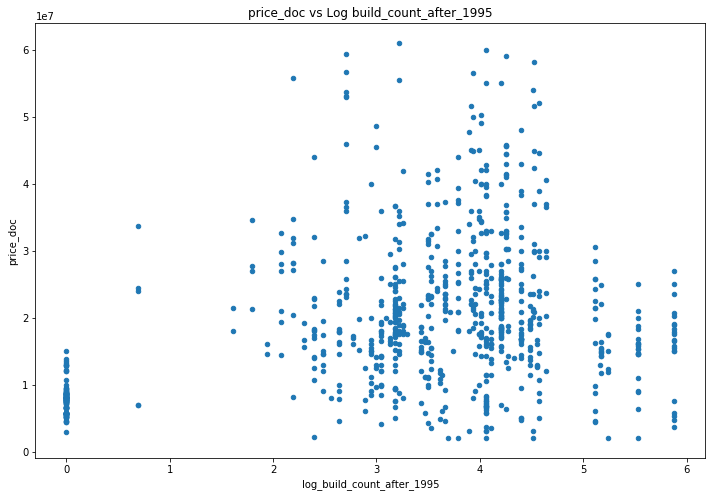

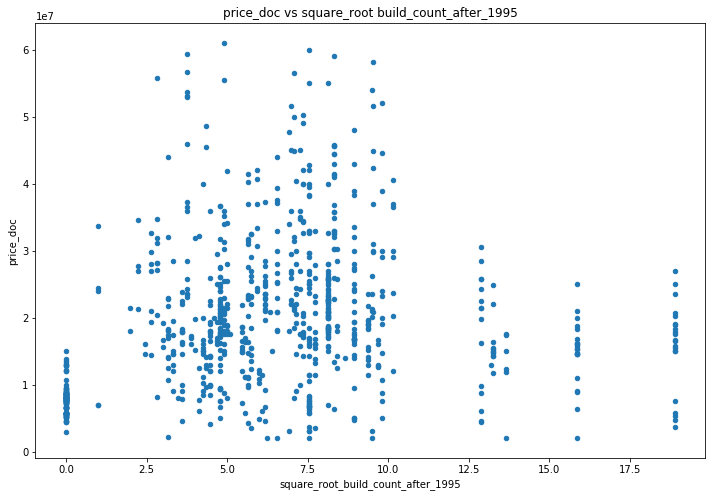

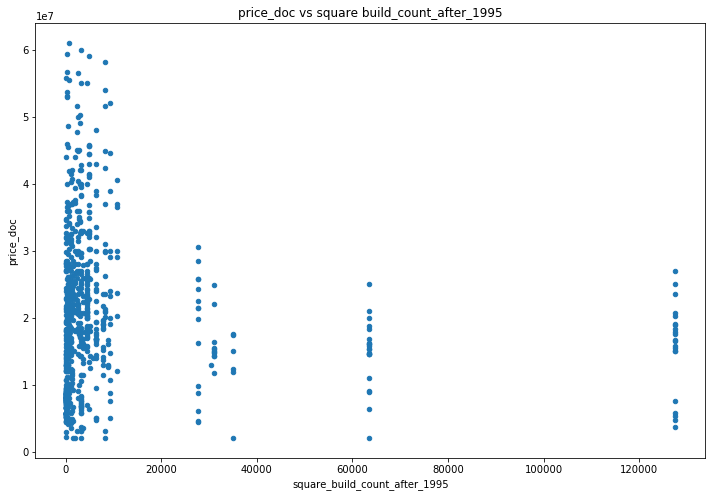

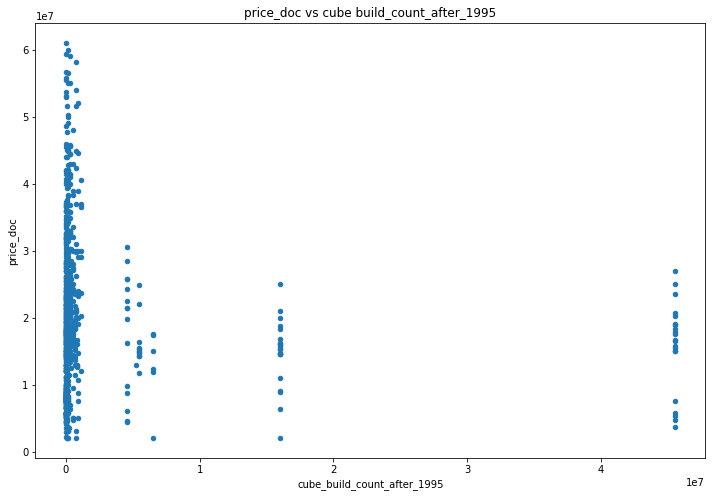

In [3]:
#df.plot.scatter(x='full_sq', y='price_doc',xlim=[0,250],title="Price vs Full Area")
    
plot_utils.plot_numeric_features_filtered("build_count_after_1995","price_doc",df,{'full_sq':[100,200]},strategy="prefix")



------Histograms for Distribution------


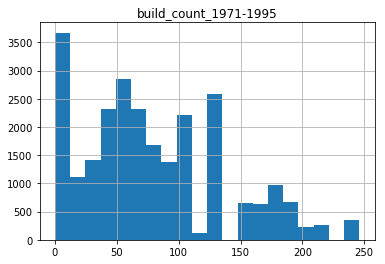

------Feature vs Predicted Column------


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

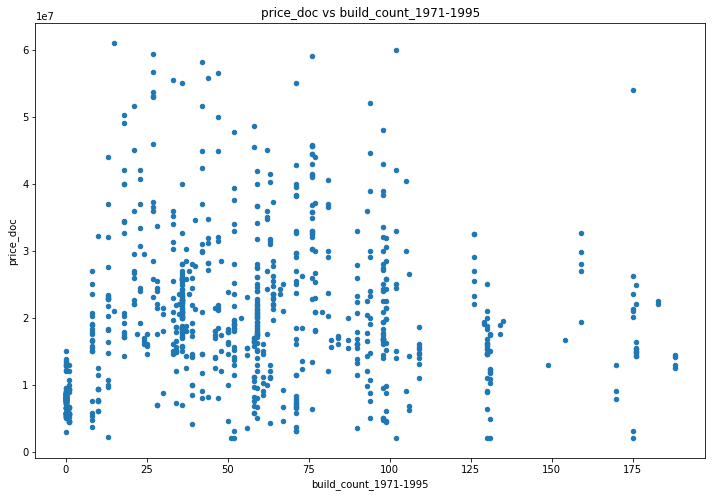

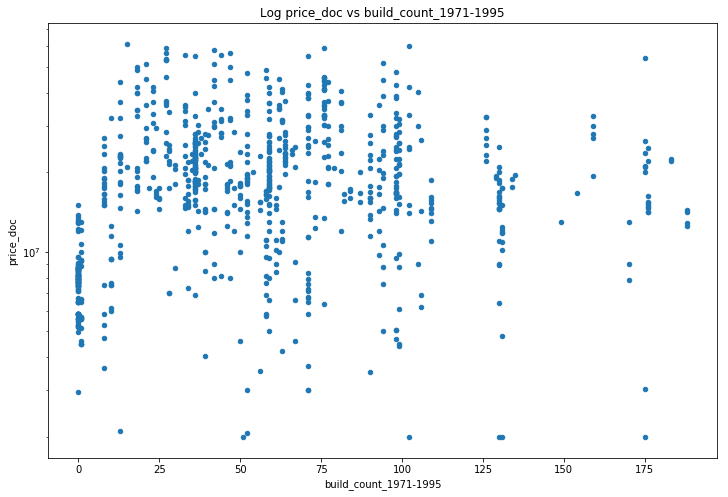

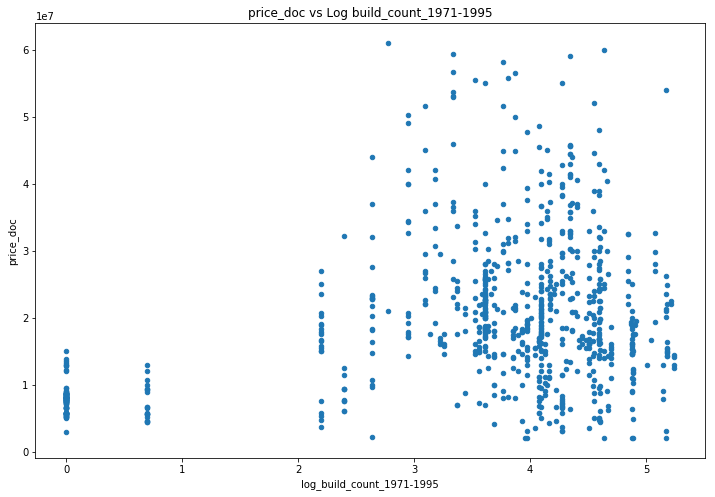

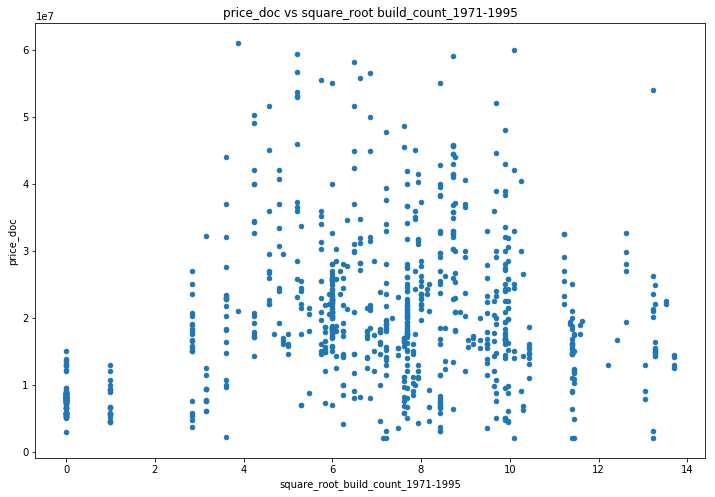

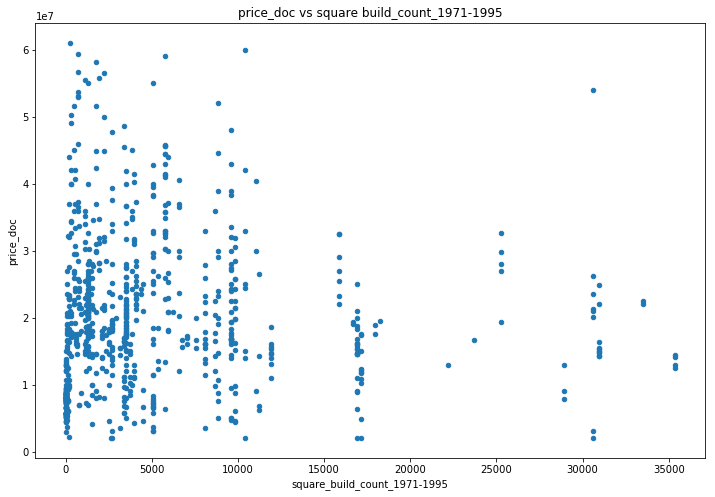

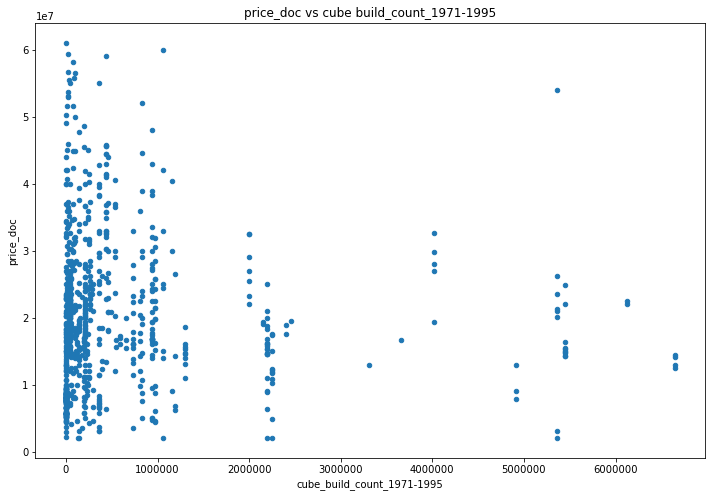

In [134]:
plot_numeric_features_filtered("build_count_1971-1995","price_doc",df,{'full_sq':[100,200]},strategy="prefix")

------Histograms for Distribution------


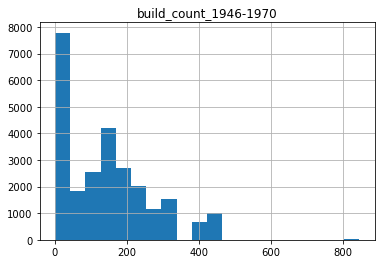

------Feature vs Predicted Column------


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

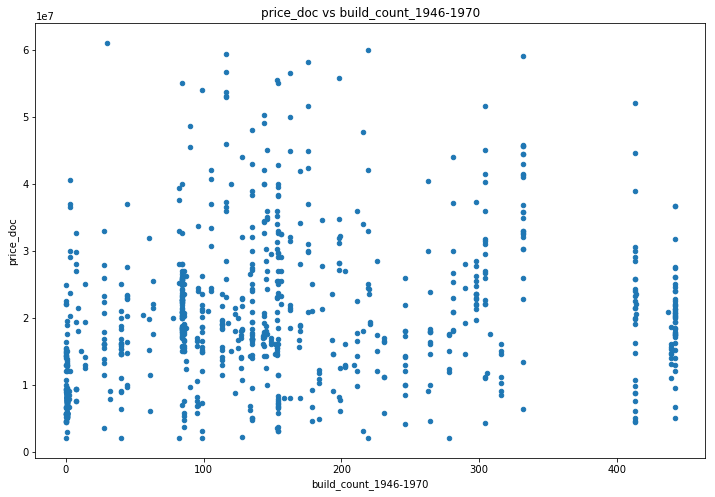

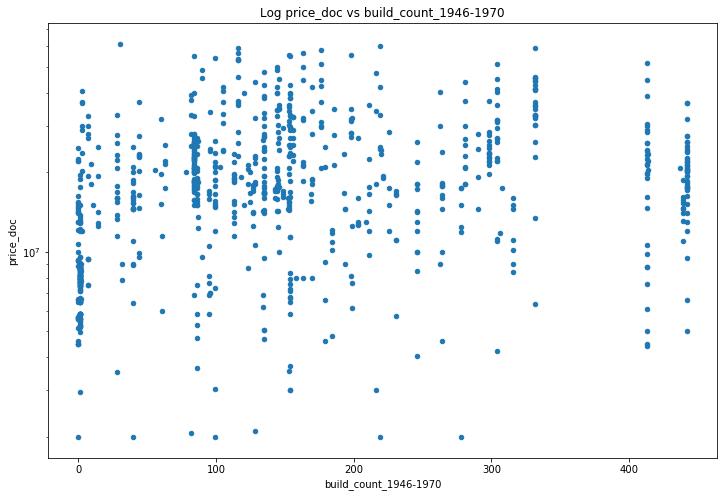

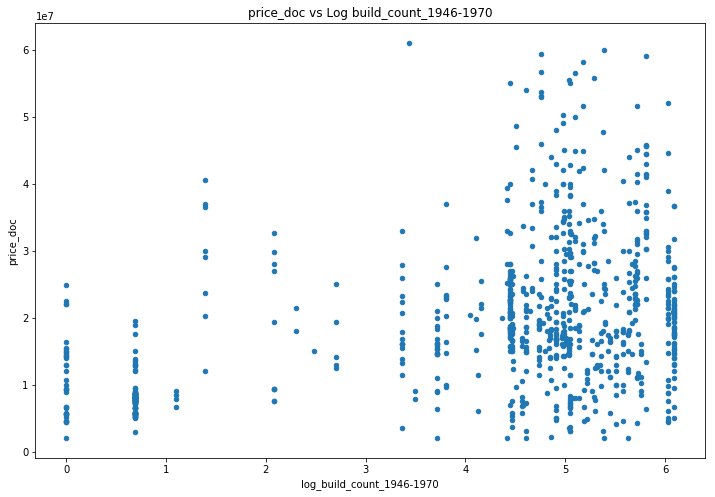

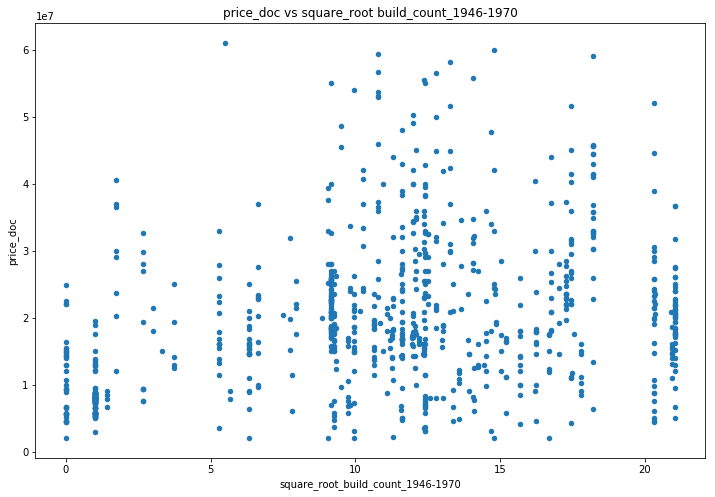

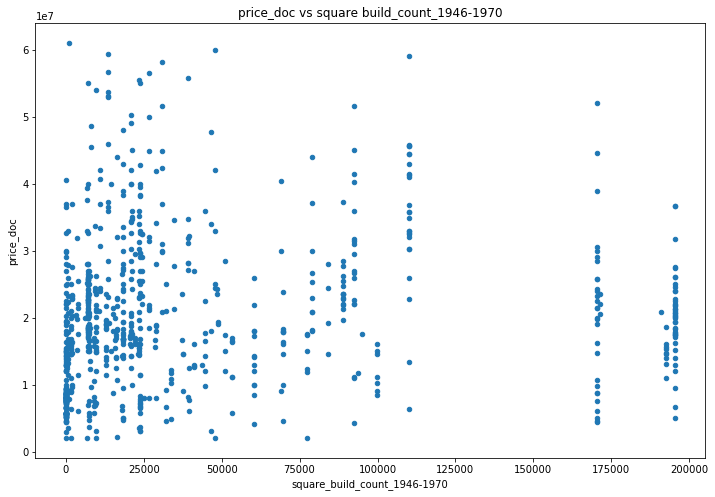

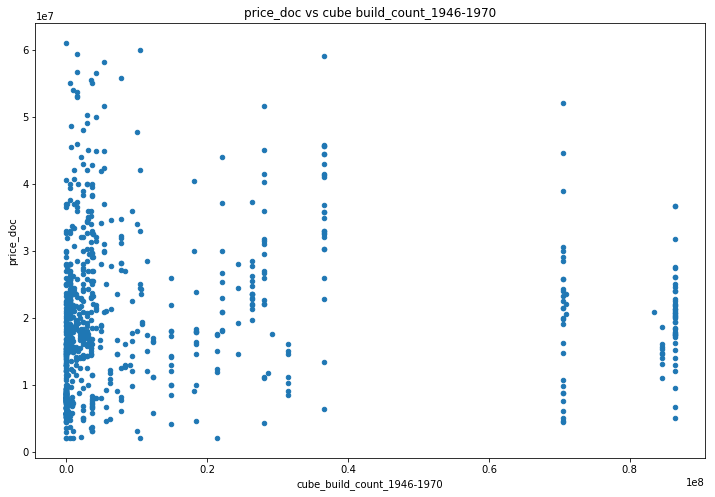

In [135]:
plot_numeric_features_filtered("build_count_1946-1970","price_doc",df,{'full_sq':[100,200]},strategy="prefix")